In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_train=pd.read_excel('C:\\Users\\Fch\\Desktop\\Concrete_Data.xls')
df_train.shape

(1030, 9)

In [6]:
for i in df_train.columns:
    j=i.lower()
    index=i.index('(')
    df_train.rename(columns={i:j[0:index-1]},inplace=True)
df_train.rename(columns={'blast furnace slag':'blast_furnace_slag','water ':'water',"concrete compressive strengt":'strength','coarse aggregate ':'coarse_agg'
                        ,'fine aggregate':'fine_agg'},inplace=True)

In [7]:
df_train.drop_duplicates(inplace=True)
df_train.head()

,cement,blast_furnace_slag,fly ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


For convenience, we adjusted 91 days to 90 days and 360 days to 365 days. Additionally, considering that the water-to-cement ratio plays a crucial role in measuring concrete strength, we calculated this ratio and included it in our table.

In [8]:
df_train.loc[df_train['age']==91,'age']=90
df_train.loc[df_train['age']==360,'age']=365
df_train['w/c']=df_train['water']/df_train['cement']

we're going to the table for *NA values* and *negative values*. You can see from the table below that there are no NA or negative values. It appears that the table has been successfully filled without any issues.

In [9]:
df_table=pd.DataFrame({'Data Type':df_train.dtypes,'Unique Values':df_train.nunique(),'NA Values':df_train.isna().sum(),'Negative Values':(df_train<0).sum()})
df_table


,Data Type,Unique Values,NA Values,Negative Values
cement,float64,280,0,0
blast_furnace_slag,float64,187,0,0
fly ash,float64,163,0,0
water,float64,205,0,0
superplasticizer,float64,155,0,0
coarse_agg,float64,284,0,0
fine_agg,float64,304,0,0
age,int64,12,0,0
strength,float64,938,0,0
w/c,float64,382,0,0


In [10]:
# Group by specified columns
grouped = df_train.groupby(['cement', 'blast_furnace_slag', 'fly ash', 'water', 'superplasticizer', 'coarse_agg', 'fine_agg'])
df_28 = grouped.filter(lambda x: (x['age'] == 28).all()).reset_index(drop=True)


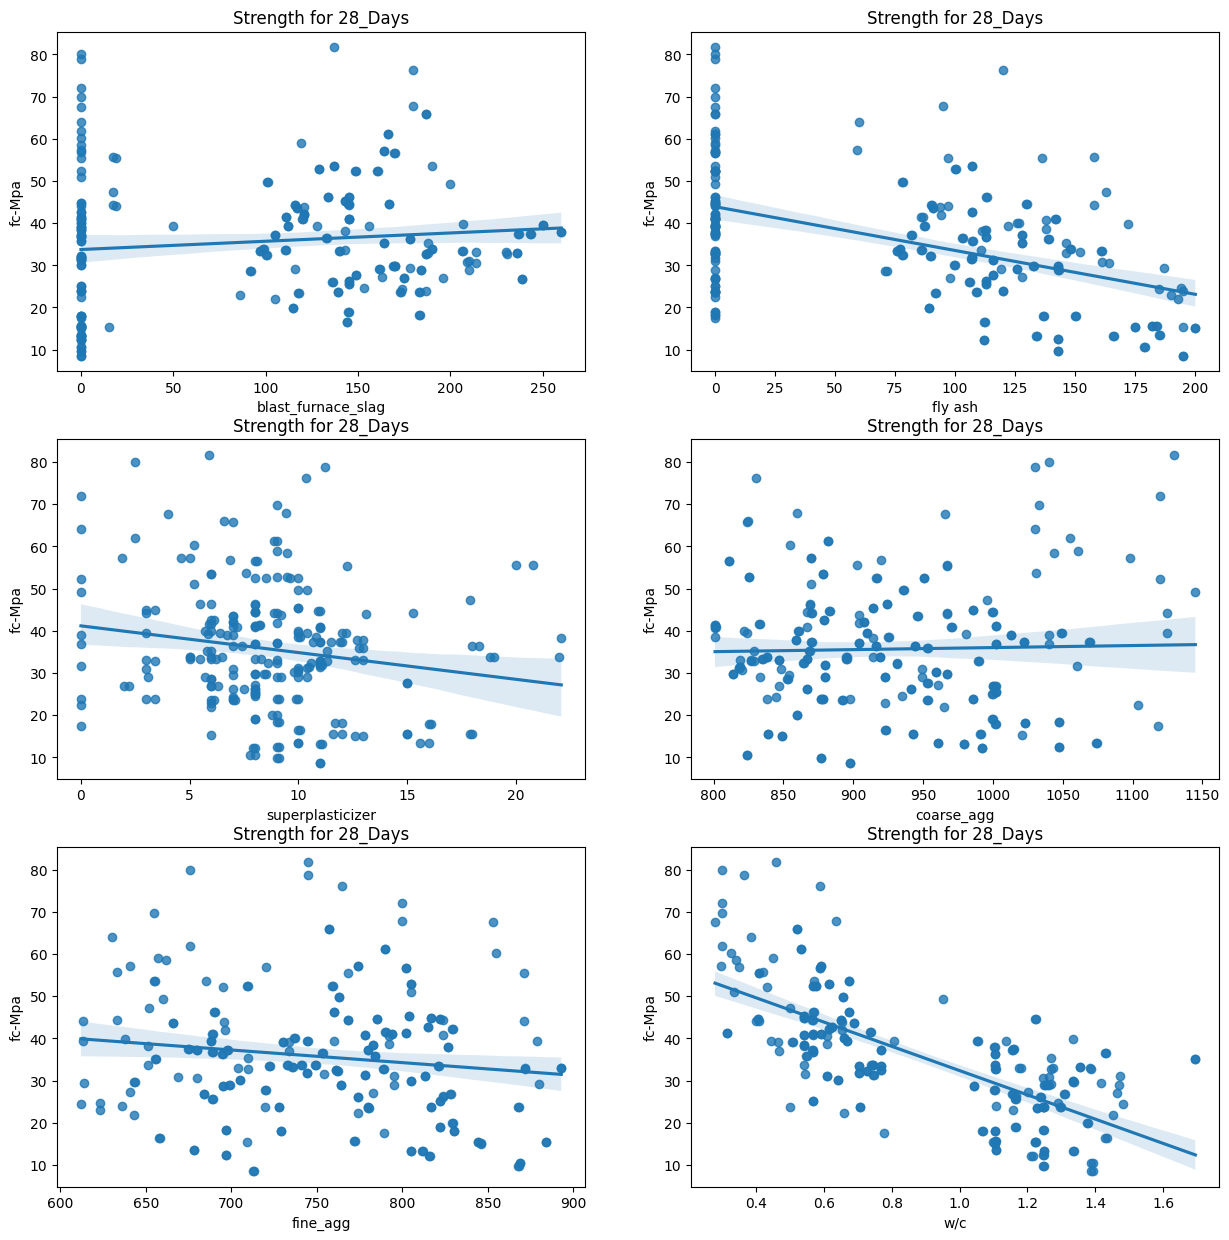

In [11]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
ax = ax.flatten()  # Flatten the 2D array of Axes
i=0
for col in ['blast_furnace_slag', 'fly ash', 'superplasticizer','coarse_agg', 'fine_agg', 'w/c']:
    sns.regplot(data=df_28,x=col,y='strength',ax=ax[i])
    ax[i].set_title('Strength for 28_Days')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('fc-Mpa')
    i+=1

As you can see, the most crucial factor influencing the concrete compressive strength (fc) is the **w/c (water-to-cement)** ratio. Therefore, we will focus primarily on analyzing this ratio. Furthermore, since the *28-day* strength is often emphasized in various analyses as base for analysis and designing, we will filter our table to include only cases where the age is equal to 28 days.
We have observed that the maximum fc value for 28-day concrete is 81.75 MPa at a w/c ratio of 0.46 *(fc_max=81.75 Mpa, w/c=0.46)*. Our goal is to investigate why, for w/c ratios lower than that corresponding to the fc_max, our fc values are below fc_max.

<Figure size 1500x1500 with 0 Axes>

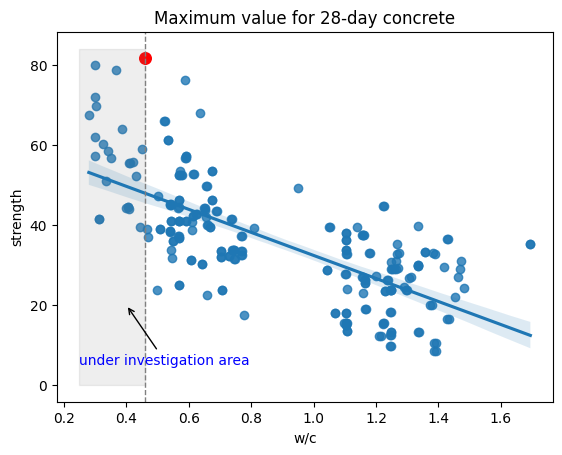

<Figure size 1500x1500 with 0 Axes>

In [12]:
r_max=df_28['strength'].idxmax()
 
sns.regplot(df_28,x='w/c',y='strength')
plt.scatter(x=df_28.loc[r_max,'w/c'],y=df_28.loc[r_max,'strength'],color='red',s=70, label='Max Strength')

#Add Vertical Line
plt.axvline(x=df_28.loc[r_max, 'w/c'], color='gray', linestyle='--', linewidth=1, label='w/c at Max Strength')

#Fill Out the Left Side of the Vertical Line
plt.fill_between(x=[0.25, df_28.loc[r_max, 'w/c']], y1=0, y2=84, color='gray', alpha=0.13, label='Shaded Area')

plt.annotate(
    'under investigation area', xy=(0.4, 20), 
    xytext=(0.25, 5),
    arrowprops=dict(arrowstyle='->'),
    fontsize=10, color='blue'
)

plt.title('Maximum value for 28-day concrete')
plt.figure(figsize=(15, 15))



In [13]:
filt=df_28['w/c'] <=df_28.loc[r_max,'w/c']
df_28_less_max=df_28[filt]


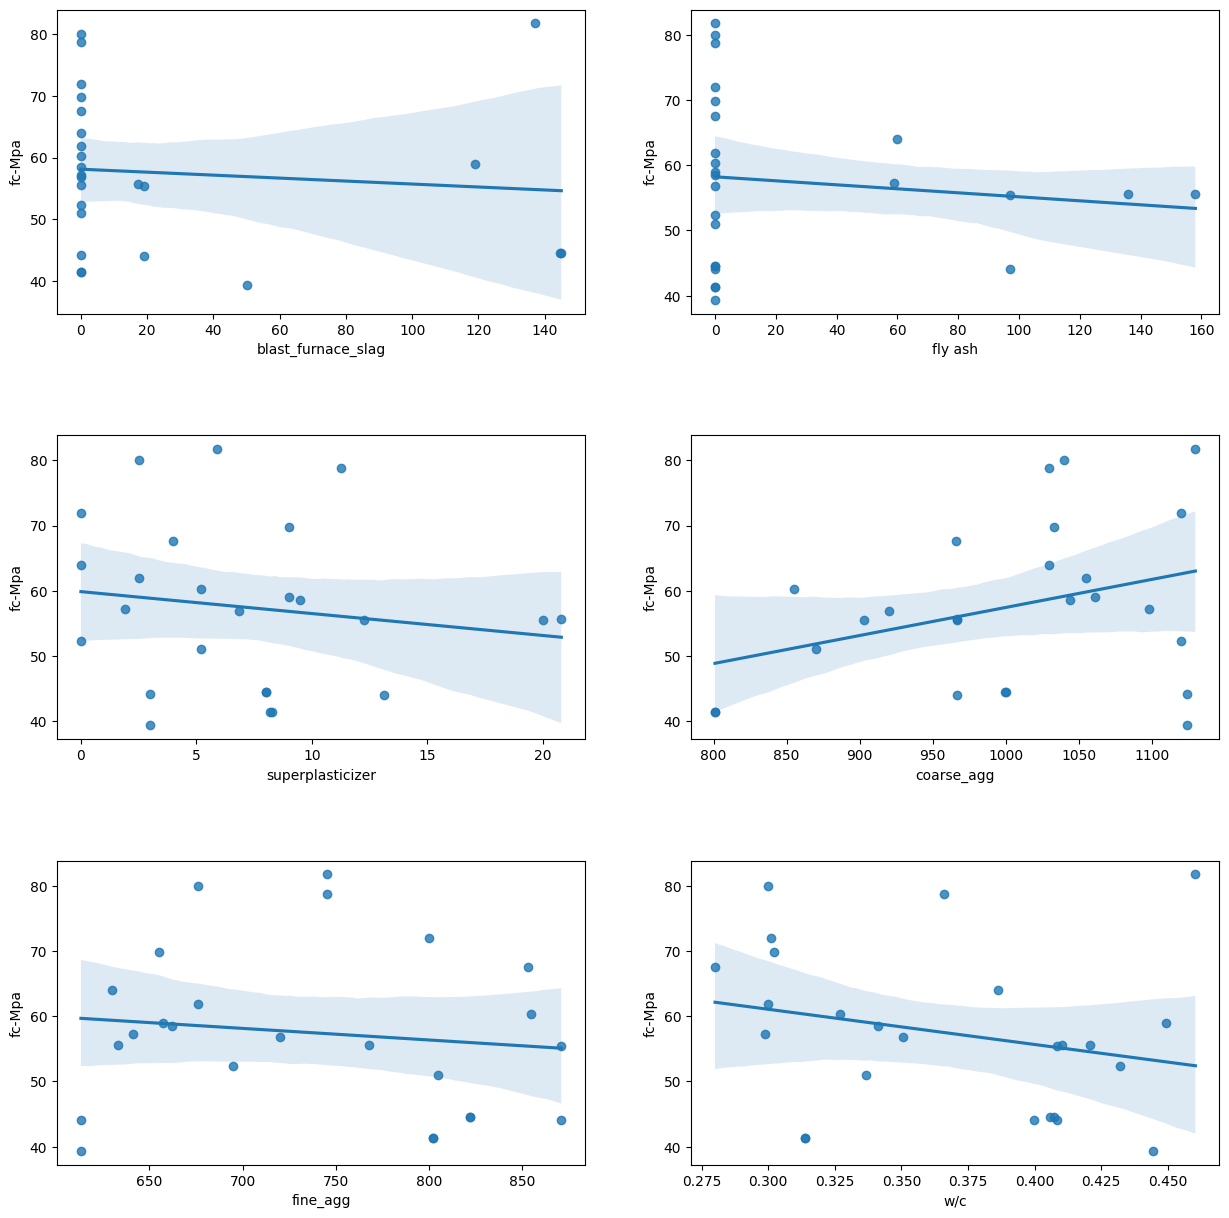

In [14]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
fig.subplots_adjust(hspace=0.4)
ax = ax.flatten()  # Flatten the 2D array of Axes
i=0
for col in ['blast_furnace_slag', 'fly ash', 'superplasticizer','coarse_agg', 'fine_agg', 'w/c']:
    sns.regplot(data=df_28_less_max,x=col,y='strength',ax=ax[i])
    #ax[i].set_title('Strength for 28_Days')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('fc-Mpa')
    i+=1

It appears that from a certain ratio of w/c, coarse aggregate has a significant impact on the compressive strength of the concrete. It can be observed that the reduction in w/c is compensated for by an increase in coarse aggregate.

#EXTRA

In [15]:
df_train.columns

Index(['cement', 'blast_furnace_slag', 'fly ash', 'water', 'superplasticizer',
       'coarse_agg', 'fine_agg', 'age', 'strength', 'w/c'],
      dtype='object')

In [16]:
df_train.nunique()

cement                280
blast_furnace_slag    187
fly ash               163
water                 205
superplasticizer      155
coarse_agg            284
fine_agg              304
age                    12
strength              938
w/c                   382
dtype: int64

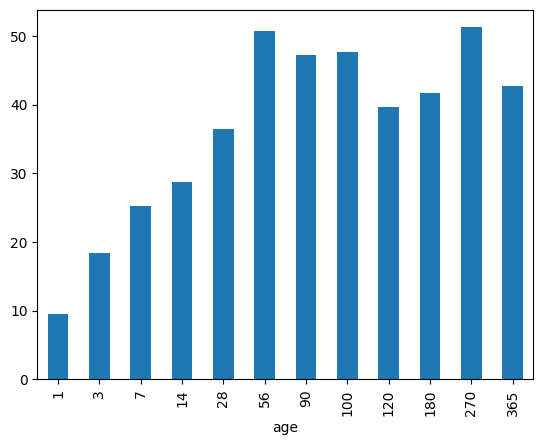

In [17]:
df_train.groupby('age')['strength'].mean().plot.bar()
plt.show()

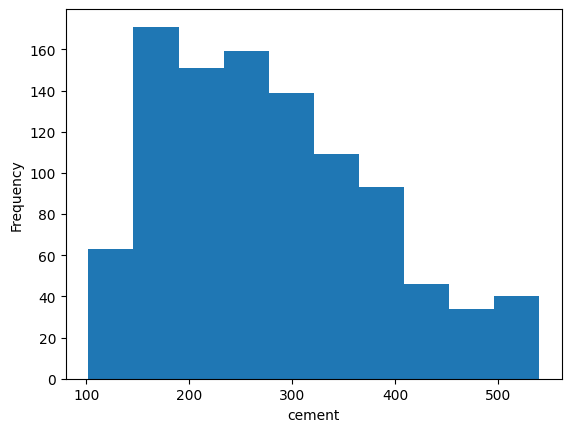

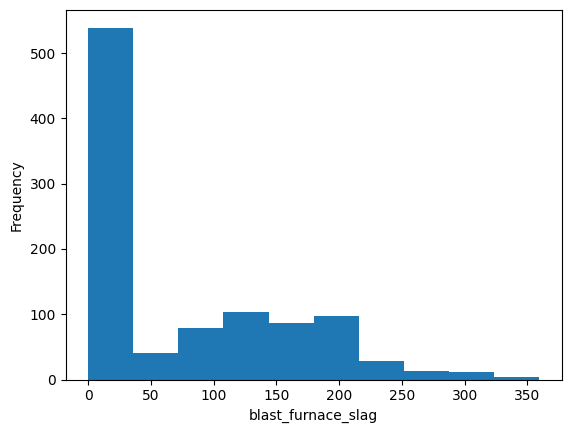

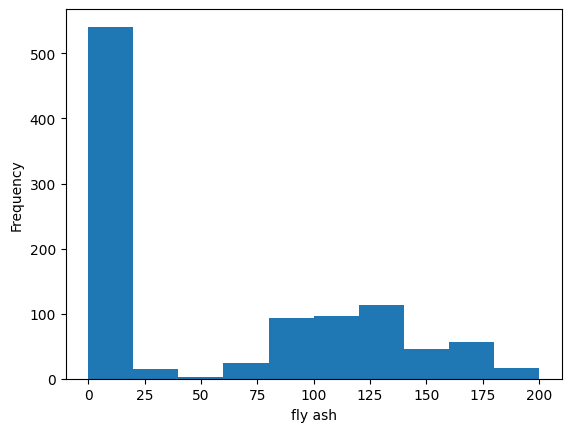

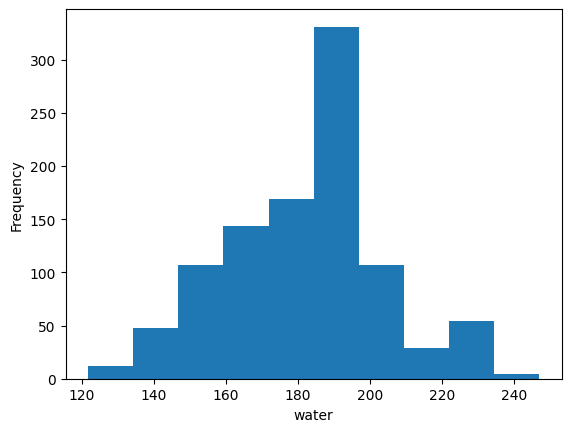

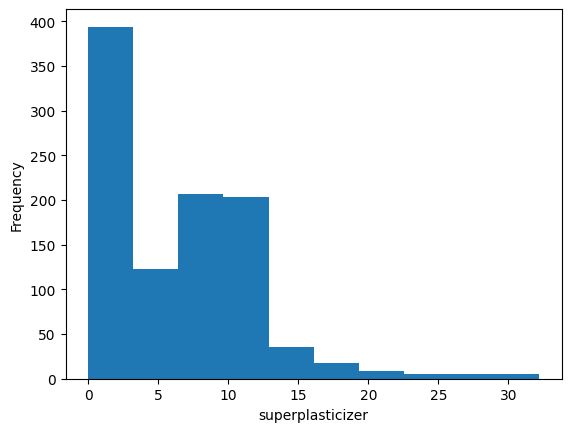

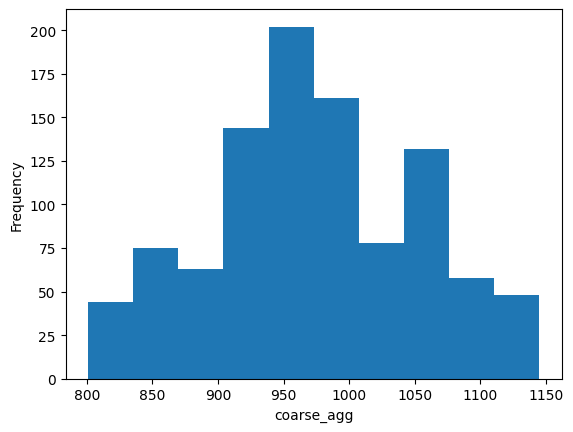

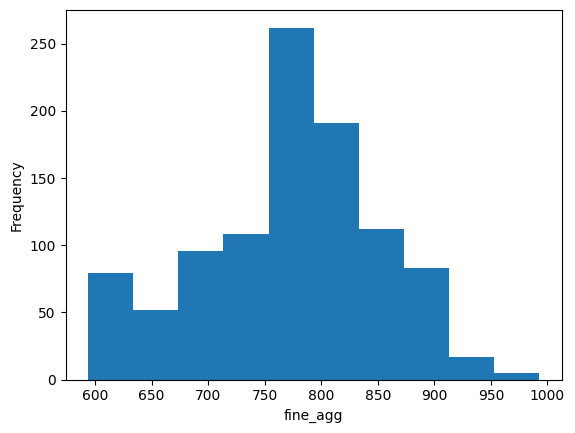

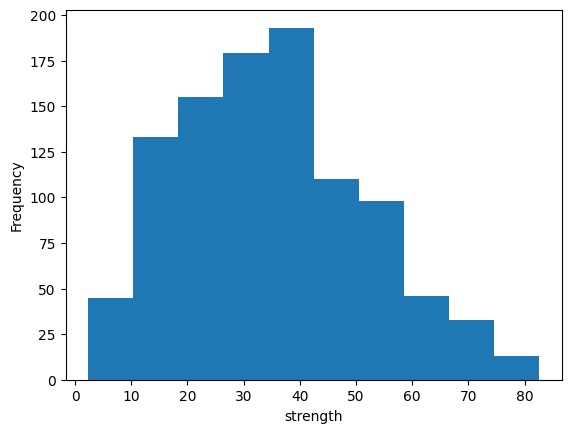

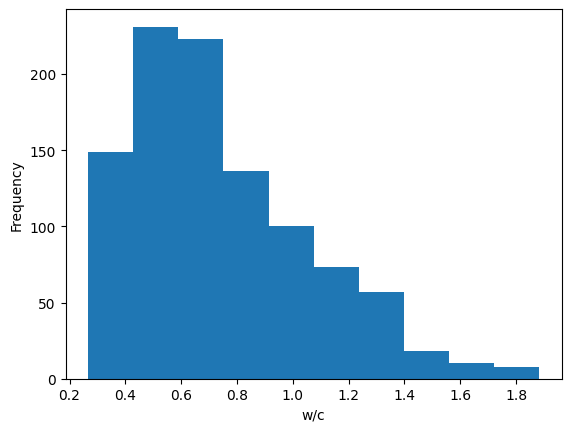

In [18]:
for i in df_train.columns:
    if i!='age':
        df_train[i].plot.hist()
        plt.xlabel(i)
        plt.show()

__Machine Learning__

We are going to perform a simple linear regression to predict concrete strength. We will use 75% of our data for training, while the remaining portion will be used as the test data.

In [79]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
X_train=df_train.loc[0:750,['cement', 'blast_furnace_slag', 'fly ash', 'water', 'superplasticizer','coarse_agg', 'fine_agg', 'age']]
Y_train=df_train.loc[0:750,'strength']
lin_reg.fit(X_train,Y_train)
print(' Intercept= ',np.round(lin_reg.intercept_,2),'\n','Parameters= ',np.round(lin_reg.coef_,4))

 Intercept=  1.36 
 Parameters=  [ 0.1036  0.0841  0.0819 -0.1757  0.3858  0.0157  0.0042  0.1197]


In [80]:
X_test=df_train.loc[751:,['cement', 'blast_furnace_slag', 'fly ash', 'water', 'superplasticizer','coarse_agg', 'fine_agg', 'age']]
Y_prdeicted=lin_reg.predict(X_test)

As you can see, simple linear regression does not perform well on the test exam.(the error rate is more than 5%.")


In [82]:
ml_output=pd.DataFrame({'actual_values':df_train.loc[751:,'strength'],'prdeicted_values':Y_prdeicted})
ml_output['error']=np.round((ml_output['prdeicted_values']-ml_output['actual_values'])/ml_output['prdeicted_values']*100,2)
ml_output

,actual_values,prdeicted_values,error
751,22.435549,21.694398,-3.42
752,21.160018,24.730250,14.44
753,31.840002,27.243713,-16.87
754,14.796155,20.236559,26.88
755,25.179664,22.750023,-10.68
...,...,...,...
1000,44.284354,39.234266,-12.87
1001,31.178794,33.361937,6.54
1002,23.696601,26.472814,10.49
1003,32.768036,29.226472,-12.12


__maybe it's better to perform other linear regression methods such as:__ random forest, Xgboost, and lightgbm or use KFold  to perform cross-validation!